
#### ASSIGNMENT-2 –IMAGE DENOISING – LEAST SQUARE APPROACH

##### Name: Vyshnav M T
##### ROll No: CB.EN.P2CEN18021

#### 1. Extend the least square solution for the below given problem formulation for signal denoising to image denoising. (Use the ‘grayscale image’ and simulate the noise using ‘imnoise command’).

### $\underset{x}{\operatorname{min}}$ ($||y-x||_{2}^{2}$ + $\lambda$ $||Dx||_{2}^{2}$) 

#### Aim:
####  To extend the least square solution for the given problem formulation for image denoising using any image. 

#### Code:




In [187]:
# importing all the libraries required
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,eye
import skimage.util as sk
import matplotlib.image as mpimg
import keras
import math
%matplotlib inline

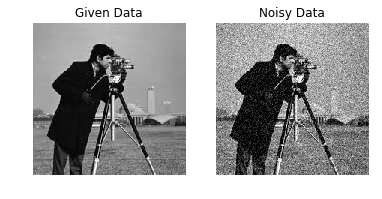

In [188]:
# loading the image 
y = cv2.imread('cameraman.jpeg',cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE will 
#convert the image to grayscale ((204x204x3) to (204x204) )

#Normalize to 0 to 1 range
y_norm = y
y_norm = y_norm.astype('float32')
y_norm /= 255

# adding random gaussian noise with var= 0.1 to the image (204x204)
y_noise= sk.random_noise(y,var = 0.01)   # values are normalized to range (0-1)

# plotting the given image
plt.subplot(1,2,1)
plt.imshow(y,cmap ='gray') # cmap='gray' will convert image to gray
plt.axis("off")
plt.title('Given Data')

# plotting the noisy image
plt.subplot(1,2,2)
plt.imshow(y_noise,cmap ='gray')  # cmap='gray' will convert image to gray
plt.axis("off")
plt.title('Noisy Data')
plt.show()

##### Smoothing (degree = 2)
D is the second-order difference matrix.
It approximates the second-order derivative.
we define D as a sparse matrix using 'spdiags'.

##### $f^{'}$(x) =  f(i+1) -1* f(i)
##### $f^{"}$(x) = f(i+2) - 2 * f(i+1) + f(i)
[1 -2 1] are the coefficents of second order differential equation




In [189]:
M,N = y_noise.shape

e = np.ones((M,1)) # column vector of ones with size = Mx1

d = np.array(e*[1,-2,1])  # 204x3
diags = np.array([0,1,2])
D = spdiags(d.T,diags,M-2,M)
#D is a Sparse diagonal matrix containing second derivative coefficients as 
#diagonal elements and rest as zeros,
#D matrix will store only the position of the values present other than zeros and
#the corresponding values 
#Since the second derivative has 3 coefficients[1 -2 1], D matrix size is taken as
#(M-2)xM,as only we can shift the coefficients only M-2 times.



##### Denoising:

##### Noisy image is first denoised clolumnwise and then its transpose is taken, then rowwise denoising is done and finally the transpose of the rowwise denoising will be the final denoised image.


In [190]:
lamda =2; # Fixing the control parameter lamda value as 0
F = eye(M) + lamda * D.T * D
F=F.toarray() # Converting to array

x1 = np.matmul(np.linalg.inv(F),y_noise) #Columnwise denoising
x1_trans=x1.T
x2 = np.matmul(np.linalg.inv(F),x1_trans).T #rowwise denoising

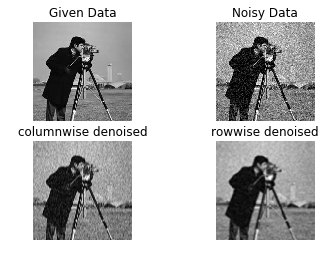

In [191]:
# create a 1x3 grid of subplots
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

# plotting the given image
ax1.imshow(y,cmap ='gray') # cmap='gray' will convert image to gray
ax1.axis("off")
ax1.set_title('Given Data')

# plotting the noisy image
ax2.imshow(y_noise,cmap ='gray')  # cmap='gray' will convert image to gray
ax2.axis("off")
ax2.set_title('Noisy Data')

# plotting the Denoised image
ax3.imshow(x1,cmap ='gray')  # cmap='gray' will convert image to gray
ax3.axis("off")
ax3.set_title('columnwise denoised')

# plotting the Denoised image
ax4.imshow(x2,cmap ='gray')  # cmap='gray' will convert image to gray
ax4.axis("off")
ax4.set_title('rowwise denoised')
plt.show()

#### Inference:

* The final denoised image after columnwise and rowwise denoising seems to a blurred image, which is almost similar to the original image.
* Least square denoising will estimate the new image from the nosiy image,thus blurred image is obtained.


#### 2.  Plot the PSNR with respect to the variation in the control parameter λ from 0 to 100 for the grayscaleimage corrupted with speckle noise (variance =0.1).

#### Aim:
####  To plot the PSNR with respect to the variation in the control parameter λ from 0 to 100 for the grayscaleimage corrupted with speckle noise (variance =0.1).

#### Code:

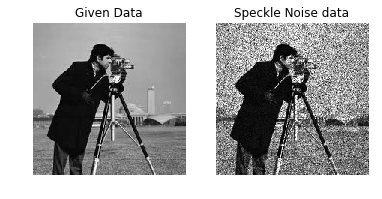

In [192]:
# Adding speckle noise with variance 0.1 to the original image
y_noise = sk.random_noise(y,mode='speckle',var=0.1)

# plotting the given image
plt.subplot(1,2,1)
plt.imshow(y,cmap ='gray') # cmap='gray' will convert image to gray
plt.axis("off")
plt.title('Given Data')

# plotting the noisy image
plt.subplot(1,2,2)

plt.imshow(y_noise,cmap ='gray')  # cmap='gray' will convert image to gray
plt.axis("off")
plt.title('Speckle Noise data')
plt.show()

##### Smoothing (degree = 2)

In [193]:
#function to find psnr(Peak-Signal Noise Ratio)
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10 * math.log10(PIXEL_MAX / math.sqrt(mse))

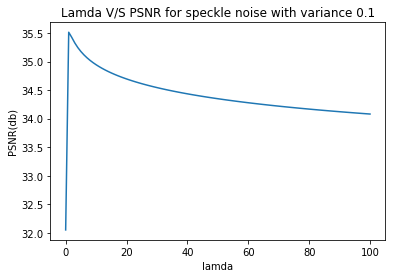

In [194]:
psnr_value = [];
lamda = [];
for lam in range(0,101):
    F = eye(M) + lam * D.T * D
    F=F.toarray() # Converting to array
  
    
    x1 = np.matmul(np.linalg.inv(F),y_noise) #Columnwise denoising
    x1_trans=x1.T
    x2 = np.matmul(np.linalg.inv(F),x1_trans).T #rowwise denoising
    
    lamda.append(lam) # appending the lamda value as array
    psnr_value.append(psnr(y_norm,x2)) # appending the psnr value as array
    
    

plt.plot(lamda,psnr_value)
plt.xlabel('lamda')
plt.ylabel('PSNR(db)')
plt.title('Lamda V/S PSNR for speckle noise with variance 0.1')
plt.show()

#### Inference:

* PSNR value gives the quality of reconstruction for an image. 
* From the graph, Initially with increase in lamda value, PSNR value also increases until a peak value of 35.5 and then PSNR value begins to decrease with increase in lamda and finally saturates to 34.0 .
* So, we can infer that until lamda value corresponding to peak PSNR value, we will get a good denoised image  and after that with increase in lamda, image will get more and more blurred, thus losing image information.


### 3. Denoise the satellite image (color) corrupted with Gaussian noise (mean=0 and variance =0.1).Compute the PSNR for the denoised image.

#### Aim:
####  To denoise the satellite image (color) corrupted with Gaussian noise (mean=0 and variance =0.1).Compute the PSNR for the denoised image.

#### Code:

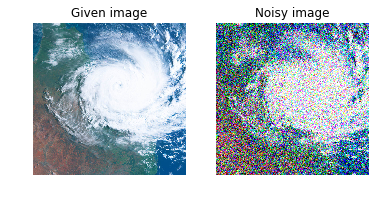

In [195]:
# directly reads the color image
y = mpimg.imread('cyclone-debbie.jpg')   #1080x1080x3
y = cv2.resize(y,(512,512))   #512x512x3

#Normalize to 0 to 1 range
y_norm = y
y_norm = y_norm.astype('float32')
y_norm /= 255

#  adding random gaussian noise with mean = 0 and var= 0.1 to the image
y_noise= sk.random_noise(y,mode='gaussian',mean = 0,var = 0.1)

# plotting the given image
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(y)
ax1.axis("off")
ax1.set_title('Given image')

# plotting the noisy image
ax2.imshow(y_noise)
ax2.axis("off")
ax2.set_title('Noisy image')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


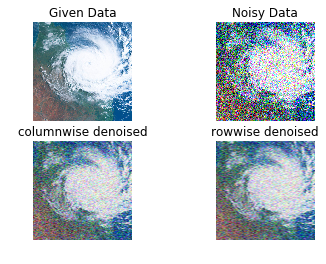

In [200]:
M,N,D = y_noise.shape

e = np.ones((M,1)) # column vector of ones with size = Mx1

d = np.array(e*[1,-2,1])  # 204x3
diags = np.array([0,1,2])
D = spdiags(d.T,diags,M-2,M)
#D is a Sparse diagonal matrix containing second derivative coefficients as 
#diagonal elements and rest as zeros,
#D matrix will store only the position of the values present other than zeros and
#the corresponding values 
#Since the second derivative has 3 coefficients[1 -2 1], D matrix size is taken as
#(M-2)xM,as only we can shift the coefficients only M-2 times.


lam =20; # Fixing the control parameter lamda value as 20
F = eye(M) + lam * D.T * D
F=F.toarray()

x1 = np.matmul(np.linalg.inv(F),y_noise) #Columnwise denoising
x1_trans=x1.T
x2 = np.matmul(np.linalg.inv(F),x1_trans).T #rowwise denoising


# create a 1x3 grid of subplots
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

# plotting the given image
ax1.imshow(y,cmap ='gray') # cmap='gray' will convert image to gray
ax1.axis("off")
ax1.set_title('Given Data')

# plotting the noisy image
ax2.imshow(y_noise,cmap ='gray')  # cmap='gray' will convert image to gray
ax2.axis("off")
ax2.set_title('Noisy Data')

# plotting the Denoised image
ax3.imshow(x1,cmap ='gray')  # cmap='gray' will convert image to gray
ax3.axis("off")
ax3.set_title('columnwise denoised')

# plotting the Denoised image
ax4.imshow(x2,cmap ='gray')  # cmap='gray' will convert image to gray
ax4.axis("off")
ax4.set_title('rowwise denoised')
plt.show()

In [201]:
print('PSNR for Denoised Image: ',psnr(y_norm,x2))

PSNR for Denoised Image:  33.36244288524993


#### Output:

PSNR value obtained for lamda(20) is  33.362

#### Inference:

* The final denoised image after columnwise and rowwise denoising seems to a blurred image, which is almost similar to the original image.
* Least square denoising will estimate the new image from the nosiy image,thus blurred image is obtained.
